This notebook is from the testing and exploration phase. However, it can still be used to determine the appropriate amount of microphones per side plane.

number of microphones in the array: 17
Side array mic positions: (reference point bottom left)
Mic 1: x = 0.54 m; y = 0.773 m
Mic 2: x = 0.715 m; y = 1.197 m
Mic 3: x = 0.904 m; y = 0.63 m
Mic 4: x = 0.289 m; y = 0.981 m
Mic 5: x = 1.074 m; y = 1.154 m
Mic 6: x = 0.561 m; y = 0.429 m
Mic 7: x = 0.442 m; y = 1.388 m
Mic 8: x = 1.231 m; y = 0.713 m
Mic 9: x = 0.126 m; y = 0.677 m
Mic 10: x = 0.963 m; y = 1.493 m
Mic 11: x = 0.892 m; y = 0.266 m
Mic 12: x = 0.08 m; y = 1.263 m
Mic 13: x = 0.252 m; y = 0.287 m
Mic 14: x = 0.589 m; y = 1.692 m
Mic 15: x = 1.312 m; y = 0.385 m
Mic 16: x = 1.302 m; y = 1.519 m
Mic 17: x = 0.649 m; y = 0.024 m


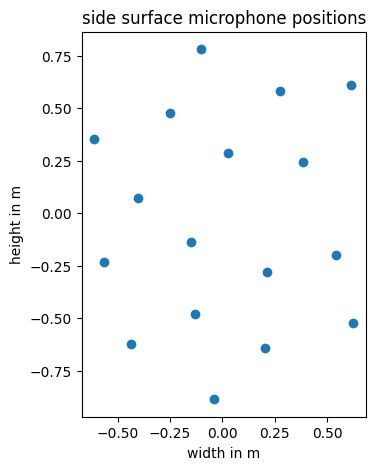

In [1]:
## Side planes
import numpy as np
import matplotlib.pyplot as plt

SideGrid_w = 1.38
SideGrid_h = 1.82

M = 20
m = np.arange(M)
V = 5
R = SideGrid_h/2

r = R*np.sqrt(m/M)
phi = 2*np.pi*m*((1+np.sqrt(V))/2)

x = np.asarray(r*np.cos(phi))
y = np.asarray(r*np.sin(phi))
coord = np.array([x,y])
coord_cut_side = np.array([x[(x >= -SideGrid_w/2) & (x <= SideGrid_w/2)],y[(x >= -SideGrid_w/2) & (x <= SideGrid_w/2)]])
coord_cut_side = coord_cut_side[:,1:]

len_side = len(coord_cut_side[1])
print('number of microphones in the array: '+str(len_side))

fig = plt.figure(figsize=[6,5])
ax = fig.add_subplot()
pl = ax.scatter(coord_cut_side[0],coord_cut_side[1])
ax.set_title('side surface microphone positions')
ax.set_xlabel('width in m')
ax.set_ylabel('height in m')
ax.set_aspect('equal')

print('Side array mic positions: (reference point bottom left)')
for i in range(0,len_side):
    print('Mic ' + str(i+1) + ': x = ' + str(round(coord_cut_side[0,i]+SideGrid_w/2,3)) + ' m; y = ' + str(round(coord_cut_side[1,i]+SideGrid_h/2,3)) + ' m')

coord_cut_side_real = coord_cut_side
coord_cut_side_real = coord_cut_side[0]+SideGrid_w/2
coord_cut_side_real = coord_cut_side[1]+SideGrid_h/2

Number of usable mics: 13


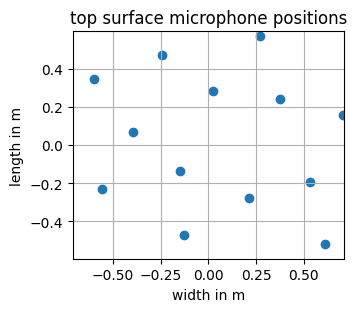

In [2]:
M = 25 # number of mics in vogels spiral
m = np.arange(M)
V = 5
R = 1
top_grid_x_m = 1.42
top_grid_y_m = 1.19

r = R*np.sqrt(m/M)
phi = 2*np.pi*m*((1+np.sqrt(V))/2)

x = np.asarray(r*np.cos(phi))
y = np.asarray(r*np.sin(phi))
coord = np.array([x,y])
coord_cut_top = np.array([x[(x >= -top_grid_x_m/2) & (x <= top_grid_x_m/2) & (y >= -top_grid_y_m/2) & (y <= top_grid_y_m/2)],y[(x >= -top_grid_x_m/2) & (x <= top_grid_x_m/2) & (y >= -top_grid_y_m/2) & (y <= top_grid_y_m/2)]])

# remove center mic
coord_cut_top=coord_cut_top[:,1:]


print("Number of usable mics:", len(coord_cut_top[1]))

fig = plt.figure(figsize=[3.5,3.5])
ax = fig.add_subplot()
pl = ax.scatter(coord_cut_top[0],coord_cut_top[1])
ax.set_title('top surface microphone positions')
ax.set_xlabel('width in m')
ax.set_ylabel('length in m')
ax.set_aspect('equal')
ax.grid()
ax.set_xlim([-top_grid_x_m/2, top_grid_x_m/2])
ax.set_ylim([-top_grid_y_m/2, top_grid_y_m/2])
plt.show()

Number of usable mics: 16


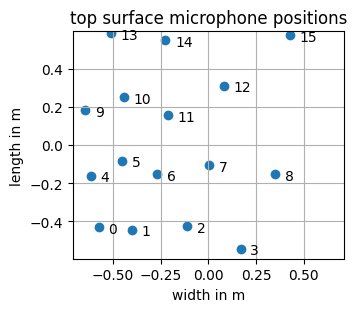

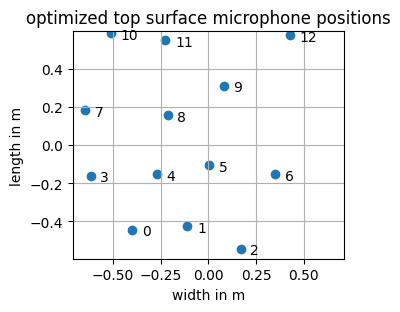

In [3]:
# Test of existing top side microphone poitions
top_grid_x_m = 1.42
top_grid_y_m = 1.19

coord_cut_top = np.array([[0.135,.311,0.6,0.880,0.094,0.258,0.442,0.715,1.059,0.065,0.266,0.496,0.790,0.198,0.485,1.138],[0.166,0.152,0.172,0.053,0.435,0.513,0.442,0.489,0.443,0.778,0.845,0.751,0.906,1.182,1.144,1.170]])
coord_cut_top[0] -= top_grid_x_m/2
coord_cut_top[1] -= top_grid_y_m/2

print("Number of usable mics:", len(coord_cut_top[1]))

txt = []
for i in range(0,16):
    txt.append(str(i))

fig = plt.figure(figsize=[3.5,3.5])
ax = fig.add_subplot()
pl = ax.scatter(coord_cut_top[0],coord_cut_top[1])
for i in range(0,16):
    ax.annotate(txt[i], (coord_cut_top[0,i],coord_cut_top[1,i]), (coord_cut_top[0,i]+0.05,coord_cut_top[1,i]-0.03))
ax.set_title('top surface microphone positions')
ax.set_xlabel('width in m')
ax.set_ylabel('length in m')
ax.set_aspect('equal')
ax.grid()
ax.set_xlim([-top_grid_x_m/2, top_grid_x_m/2])
ax.set_ylim([-top_grid_y_m/2, top_grid_y_m/2])
plt.show()

coord_cut_top = coord_cut_top[:,[1,2,3,4,6,7,8,9,11,12,13,14,15]]

fig = plt.figure(figsize=[3.5,3.5])
ax = fig.add_subplot()
pl = ax.scatter(coord_cut_top[0],coord_cut_top[1])
for i in range(0,len(coord_cut_top[0])):
    ax.annotate(txt[i], (coord_cut_top[0,i],coord_cut_top[1,i]), (coord_cut_top[0,i]+0.05,coord_cut_top[1,i]-0.03))
ax.set_title('optimized top surface microphone positions')
ax.set_xlabel('width in m')
ax.set_ylabel('length in m')
ax.set_aspect('equal')
ax.grid()
ax.set_xlim([-top_grid_x_m/2, top_grid_x_m/2])
ax.set_ylim([-top_grid_y_m/2, top_grid_y_m/2])
plt.show()

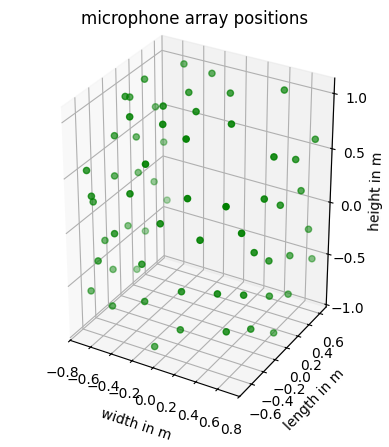

In [4]:
# %matplotlib widget
# from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt

coord_3d_left = np.array([np.ones(len_side)*0.7, coord_cut_side[0], coord_cut_side[1]])
coord_3d_right = np.array([np.ones(len_side)*-0.7, coord_cut_side[0]*-1, coord_cut_side[1]*-1])
coord_3d_front = np.array([coord_cut_side[0], np.ones(len_side)*-0.7, coord_cut_side[1]])
coord_3d_top = np.array([coord_cut_top[0], coord_cut_top[1], np.ones(len(coord_cut_top[0]))])
coord_3d = np.append(coord_3d_front, coord_3d_left, axis = 1)
coord_3d = np.append(coord_3d, coord_3d_right, axis = 1)
coord_3d = np.append(coord_3d, coord_3d_top, axis = 1)

fig = plt.figure(3)#figsize=[8,8])
ax = fig.add_subplot(projection='3d')
pl = ax.scatter(coord_3d[0],coord_3d[1],coord_3d[2], color = 'green')
ax.set_title('microphone array positions')
ax.set_xlabel('width in m')
ax.set_ylabel('length in m')
ax.set_zlabel('height in m')
ax.set_aspect('equal')
plt.show()

following code used to save the mic positions as xml. It got replaced by "generate_ideal_mic_side_positions_as_excel.py"

In [5]:
#%matplotlib widget
## from mpl_toolkits.mplot3d import Axes3D 
#import matplotlib.pyplot as plt
#
#coord_3d_left = np.array([np.ones(len_side)*0.7, coord_cut_side[0], coord_cut_side[1]])
#coord_3d_right = np.array([np.ones(len_side)*-0.7, coord_cut_side[0]*-1, coord_cut_side[1]*-1])
#coord_3d_front = np.array([coord_cut_side[0], np.ones(len_side)*-0.7, coord_cut_side[1]])
#coord_3d_top = np.array([coord_cut_top[0], coord_cut_top[1], np.ones(len(coord_cut_top[0]))])
#
#fig = plt.figure(3)
#ax = fig.add_subplot(projection='3d')
#pl = ax.scatter(coord_3d_left[0],coord_3d_left[1],coord_3d_left[2], color = 'green')
#pl = ax.scatter(coord_3d_right[0],coord_3d_right[1],coord_3d_right[2], color = 'red')
#pl = ax.scatter(coord_3d_front[0],coord_3d_front[1],coord_3d_front[2], color = 'blue')
#pl = ax.scatter(coord_3d_top[0],coord_3d_top[1],coord_3d_top[2], color = 'orange')
#
#
#ax.set_title('microphone array positions')
#ax.set_xlabel('width in m')
#ax.set_ylabel('length in m')
#ax.set_zlabel('height in m')
#ax.set_aspect('equal')
#plt.show()

In [6]:
## save all side plane coords
#coord_3d = np.round(coord_3d, 3)
#headerXML = '''<?xml version="1.0" encoding="utf-8"?>
#<MicArray name="bassoon_cage_64_existing">
#'''
#
#elements = ""
#i = 0
#for element in coord_3d.T:
#    elements = elements + '  <pos Name="Point %s" x="%s" y="%s" z="%s"/>\n'% (i,coord_3d[0,i],coord_3d[1,i],coord_3d[2,i])
#    i = i + 1
#
#footerXML = '''
#</MicArray>
#'''
#
#XML = (headerXML+elements+footerXML)
#outFile = open("data/bassoon_cage_64_existing.xml","w")
#outFile.write(XML)
#outFile.close()

In [7]:
#coord_3d = np.round(coord_3d, 3)
#headerXML = '''<?xml version="1.0" encoding="utf-8"?>
#<MicArray name="bassoon_cage_64_existing">
#'''
#
#elements = ""
#i = 0
#for element in coord_3d_left.T:
#    elements = elements + '  <pos Name="Point %s" x="%s" y="%s" z="%s"/>\n'% (i,coord_3d[0,i],coord_3d[1,i],coord_3d[2,i])
#    i = i + 1
#
#footerXML = '''
#</MicArray>
#'''
#
#XML = (headerXML+elements+footerXML)
#outFile = open("data/bassoon_cage_left_64_existing.xml","w")
#outFile.write(XML)
#outFile.close()